In [16]:
import pandas as pd
import numpy as np

cols_to_use = [
    'Country', 'Capacity (MW)', 'Status', 'Start year',
    'Combustion technology', 'Coal type', 'Region',
    'Annual CO2 (million tonnes / annum)'
]
df = pd.read_excel(
    './data/Global-Coal-Plant-Tracker-January-2024.xlsx',
    sheet_name='Units', usecols=cols_to_use
)

In [17]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13906 entries, 0 to 13905
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              13906 non-null  object 
 1   Capacity (MW)                        13906 non-null  float64
 2   Status                               13906 non-null  object 
 3   Start year                           10281 non-null  float64
 4   Combustion technology                13906 non-null  object 
 5   Coal type                            13906 non-null  object 
 6   Region                               13906 non-null  object 
 7   Annual CO2 (million tonnes / annum)  13906 non-null  float64
dtypes: float64(3), object(5)
memory usage: 4.1 MB


In [18]:
df.memory_usage(deep=True)

Index                                     132
Country                                778963
Capacity (MW)                          111248
Status                                 801876
Start year                             111248
Combustion technology                  839171
Coal type                              800189
Region                                 747644
Annual CO2 (million tonnes / annum)    111248
dtype: int64

One could reduce memory usage by converting any or all of the 'Country', 'Status', 'Combustion Technology', and 'Coal type' columns to categoricals. There's very little point when the whole frame uses only 10s of megabytes, which is not a lot for even a modern PC. It's not at all profitable to think of "Country" as a category, because there are 107 distinct ones here. There are only six coal types and ten or eleven statuses or combustion technologies. If this dataframe were two orders of magnitude larger, it might make some sense to make these categoricals.

In [19]:
for x in ['Country', 'Status', 'Combustion technology', 'Coal type']:
    print(f'*{x}*')
    print(df[x].drop_duplicates())
    print('----')

*Country*
0           Albania
1         Argentina
4         Australia
139         Austria
150      Bangladesh
            ...    
13624    Uzbekistan
13643     Venezuela
13648       Vietnam
13845        Zambia
13858      Zimbabwe
Name: Country, Length: 107, dtype: object
----
*Status*
0         cancelled
1         operating
2      construction
4           retired
20       mothballed
22       pre-permit
157         shelved
184       announced
331       permitted
Name: Status, dtype: object
----
*Combustion technology*
0           ultra-supercritical
1                   subcritical
5                       unknown
16              subcritical/ccs
19                supercritical
33                         IGCC
128                    IGCC/ccs
132                         CFB
449           supercritical/ccs
1224                unknown/ccs
1750    ultra-supercritical/ccs
Name: Combustion technology, dtype: object
----
*Coal type*
0         bituminous
4            lignite
5            unknown
12

In [20]:
df = df.query('Status == "operating"')

In [21]:
df.query('`Combustion technology`.str.contains("IGCC|ccs", regex=True)')

,Country,Capacity (MW),Status,Start year,Combustion technology,Coal type,Region,Annual CO2 (million tonnes / annum)
445,Canada,110.0,operating,2014.0,subcritical/ccs,lignite,Americas,0.1
1778,China,250.0,operating,2012.0,IGCC,unknown,Asia,1.2
5147,China,1000.0,operating,2016.0,ultra-supercritical/ccs,bituminous,Asia,0.6
9729,Japan,543.0,operating,2021.0,IGCC,unknown,Asia,1.9
9798,Japan,525.0,operating,2021.0,IGCC,unknown,Asia,1.9
9826,Japan,166.0,operating,2017.0,IGCC,unknown,Asia,0.7
11672,South Korea,346.0,operating,2016.0,IGCC,unknown,Asia,1.3
11700,South Korea,30.0,operating,1977.0,subcritical/ccs,unknown,Asia,0.0
11701,South Korea,30.0,operating,1977.0,subcritical/ccs,unknown,Asia,0.0
12766,United States,236.5,operating,2013.0,IGCC,unknown,Americas,1.1


In [22]:
df['Annual CO2 (million tonnes / annum)'].sum()

10019.1

In [28]:
df['Efficiency'] = df['Capacity (MW)']/df['Annual CO2 (million tonnes / annum)']
(df.loc[:, ['Coal type', 'Combustion technology', 'Efficiency']]
   .groupby(by=['Coal type', 'Combustion technology']).mean()
   .sort_values(by='Efficiency', ascending=False)
 )

,,Efficiency
Coal type,Combustion technology,
unknown,subcritical/ccs,inf
bituminous,ultra-supercritical/ccs,1666.666667
subbituminous,subcritical/ccs,1229.200000
lignite,subcritical/ccs,1100.000000
waste coal,ultra-supercritical,258.428878
subbituminous,ultra-supercritical,253.948547
unknown,ultra-supercritical,252.980136
bituminous,ultra-supercritical,247.034325
unknown,IGCC,242.565127


<Axes: xlabel='Capacity (MW)', ylabel='Annual CO2 (million tonnes / annum)'>

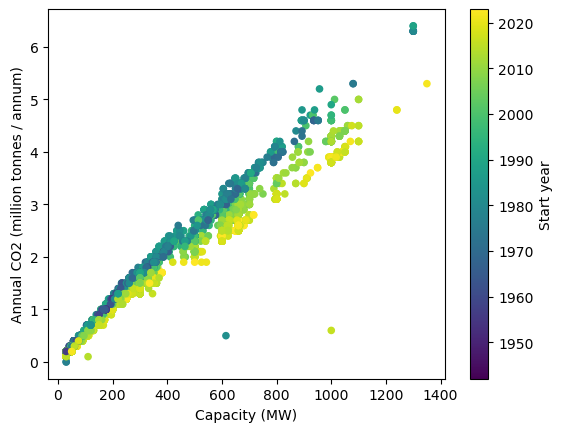

In [24]:
(df.loc[:, ['Start year', 'Capacity (MW)', 'Annual CO2 (million tonnes / annum)']]
   .plot.scatter(x='Capacity (MW)', y='Annual CO2 (million tonnes / annum)', c='Start year')
 )

<Axes: xlabel='Start year'>

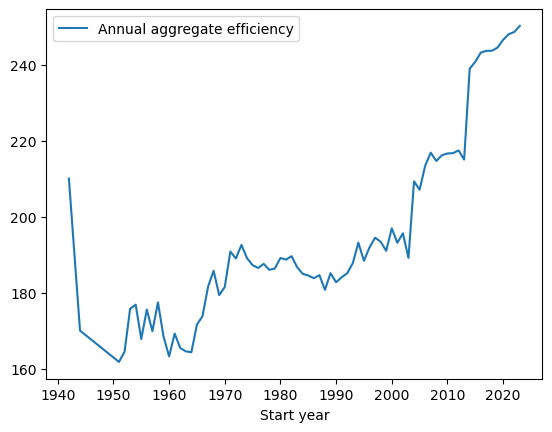

In [25]:
agg_efficiency = (
    df.loc[:, ['Start year', 'Capacity (MW)', 'Annual CO2 (million tonnes / annum)']]
   .groupby(by='Start year').sum()
)
agg_efficiency['Annual aggregate efficiency'] = (
        agg_efficiency['Capacity (MW)']/agg_efficiency['Annual CO2 (million tonnes / annum)']
)
agg_efficiency.plot(y='Annual aggregate efficiency')

<Axes: xlabel='Start year'>

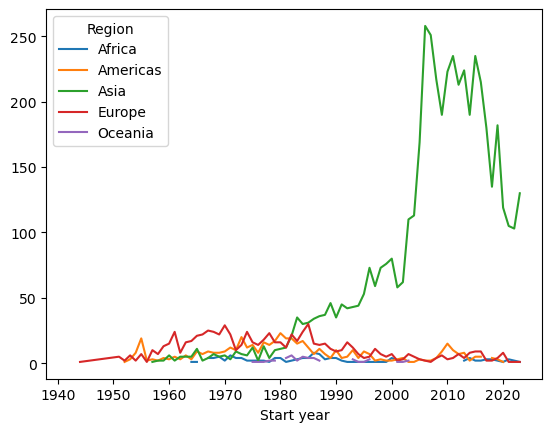

In [29]:
df.loc[:, ['Start year', 'Region']].dropna().value_counts().unstack('Region').plot()